<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook Setup</a></span></li><li><span><a href="#Data-Download-and-Cleaning" data-toc-modified-id="Data-Download-and-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Download and Cleaning</a></span></li><li><span><a href="#Event-Detection" data-toc-modified-id="Event-Detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Event Detection</a></span></li><li><span><a href="#Trends-&amp;-Stationarity" data-toc-modified-id="Trends-&amp;-Stationarity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Trends &amp; Stationarity</a></span></li><li><span><a href="#Periodicity" data-toc-modified-id="Periodicity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Periodicity</a></span></li></ul></div>

## Notebook Setup

In [76]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

## Data Download and Cleaning

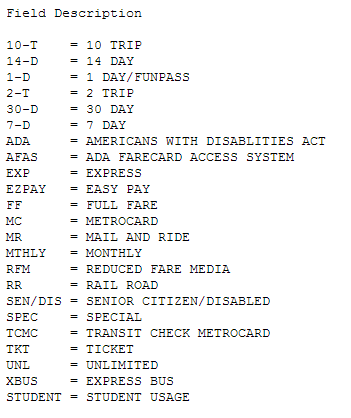

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

In [98]:
types = ["10 TRIP","14 DAY","1 DAY","2 TRIP","30 DAY", "7 DAY", "ADA", "AFAS",
                              "EXPRESS", "EZPAY", "FULL FARE", "METROCARD", "MAIL AND RIDE", "MONTHLY",
                              "REDUCED FARE MEDIA", "RAILROAD", "SENIOR", "SPECIAL", "TRANSIT CHECK",
                              "TICKET", "UNLIMITED", "EXPRESS BUS", "STUDENT USAGE"]
index = range(23)
rideTypes =  dict(zip(index, types))

In [99]:
rideTypes

{0: '10 TRIP',
 1: '14 DAY',
 2: '1 DAY',
 3: '2 TRIP',
 4: '30 DAY',
 5: '7 DAY',
 6: 'ADA',
 7: 'AFAS',
 8: 'EXPRESS',
 9: 'EZPAY',
 10: 'FULL FARE',
 11: 'METROCARD',
 12: 'MAIL AND RIDE',
 13: 'MONTHLY',
 14: 'REDUCED FARE MEDIA',
 15: 'RAILROAD',
 16: 'SENIOR',
 17: 'SPECIAL',
 18: 'TRANSIT CHECK',
 19: 'TICKET',
 20: 'UNLIMITED',
 21: 'EXPRESS BUS',
 22: 'STUDENT USAGE'}

In [5]:
data = np.load('MTA_Fare.npy')
data.shape

(600, 23, 194)

In [10]:
timeData = np.empty([194])

for i in range(0, 193):
    timeData[i] = data[:,:,i].sum()

In [12]:
stationData = np.empty([600, 194])

for i in range(0, 599):
    for j in range(0, 193):
        stationData[i,j] = data[i,:,j].sum()

In [13]:
rideData = np.empty([23, 194])

for i in range(0, 22):
    for j in range(0, 193):
        rideData[i,j] = data[:,i,j].sum()

In [51]:
dateIndex = [np.datetime64('2010-05-21')]

for i in range(0, 195):
    dateIndex.append(dateIndex[i] + np.timedelta64(7,'D'))  

## Event Detection

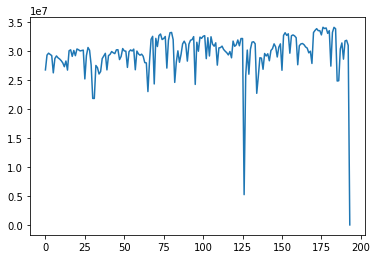

In [83]:
plt.plot(range(len(timeData)),timeData)
plt.show()

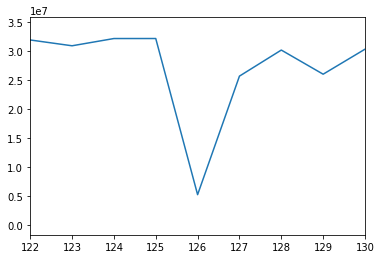

In [85]:
plt.plot(range(len(timeData)),timeData)
plt.xlim(122,130)
plt.show()

In [87]:
dateIndex[127]

numpy.datetime64('2012-10-26')

A brief Google search shows that on October 28, 2012, the Subway was shut down in preparation for the landing of Hurricane Sandy

In [79]:
def changeFinder(data):

    n = len(data)
    datamean = data.mean()
    datasqmean = (data**2).mean()
    fac = datasqmean - datamean**2
    
    datacsum = data.cumsum()
    datasum = datacsum[-1]

    ppoc = np.zeros(n) #container for point of change relative prob

    #online (iterative) search for point of change
    for m in range(n-1):
        pos = m + 1
        relativePosition = (pos) * (n - pos)
        Q = datacsum[m] - (datasum - datacsum[m]) #cumsum up to m - cumsum after
        U = -(datamean * (n - 2 * pos) + Q)**2 / (4.0 * relativePosition) + fac   
        ppoc[m+1] = (-(n * 0.5 - 1) * np.log(n * U * 0.5) - 
                 0.5 * np.log(relativePosition))

    ppoc[0] = min(ppoc[1:])
    changePoint = np.argmax(ppoc)
    
    return {'pChange': ppoc, 
            'pointOfChange': changePoint + 1,
            'meanBefore': (data[:changePoint+1]).mean(), 
            'meanAfter': (data[(changePoint+1):]).mean()}

In [146]:
pochange = changeFinder(timeData);
pochange['pointOfChange']

/Users/seanandrewchen/Dropbox/academics/graduate/nyu-cusp/semester_01/urban-informatics/coding/PUI2017/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.
/Users/seanandrewchen/Dropbox/academics/graduate/nyu-cusp/semester_01/urban-informatics/coding/PUI2017/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


194

## Trends & Stationarity

In [126]:
riderType = pd.DataFrame(data=rideData[:,:]) 

In [129]:
riderType = riderType.iloc[:, :-1]
ridertype = riderType.dropna

In [130]:
riderType

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,1.149448e+07,1.252672e+07,12766490.0,12653538.0,12809558.0,11429646.0,1.234674e+07,12576621.0,12436978.0,12431120.0,...,1.373598e+07,1.424480e+07,1.460389e+07,1.134481e+07,1.122329e+07,1.286473e+07,1.290467e+07,1.193283e+07,1.313922e+07,1.318947e+07
1,5.303860e+05,5.833940e+05,586057.0,562465.0,548722.0,455554.0,5.180510e+05,513274.0,512055.0,522432.0,...,8.037340e+05,7.902830e+05,7.813900e+05,5.962030e+05,5.188190e+05,6.643930e+05,7.448530e+05,6.131560e+05,7.135790e+05,6.949960e+05
2,4.766300e+04,5.134700e+04,51499.0,51926.0,51017.0,46715.0,4.882700e+04,49491.0,48893.0,50239.0,...,6.505600e+04,6.428100e+04,6.251900e+04,5.068200e+04,4.501600e+04,5.599100e+04,6.029200e+04,5.152600e+04,5.707000e+04,5.863300e+04
3,1.864130e+05,1.990900e+05,199531.0,196252.0,194747.0,175511.0,1.883310e+05,187952.0,186685.0,190391.0,...,2.004150e+05,1.977460e+05,1.931290e+05,1.644690e+05,1.485150e+05,1.777470e+05,1.934100e+05,1.687940e+05,1.894260e+05,1.841010e+05
4,4.667000e+04,6.421400e+04,56857.0,37292.0,35074.0,46712.0,6.008900e+04,47301.0,31947.0,52034.0,...,6.414000e+04,6.735400e+04,5.653200e+04,2.248500e+04,2.516400e+04,6.757500e+04,6.473000e+04,4.328800e+04,4.766600e+04,6.096300e+04
5,3.697305e+06,3.981669e+06,4032893.0,4032616.0,3925310.0,3663007.0,3.917968e+06,4028113.0,4030580.0,4032203.0,...,6.073982e+06,6.461599e+06,6.388399e+06,5.230427e+06,5.332788e+06,5.260264e+06,5.427037e+06,4.969929e+06,5.511475e+06,5.599099e+06
6,8.551799e+06,9.486255e+06,9476401.0,9449944.0,9293866.0,8286666.0,9.271277e+06,9306437.0,9145715.0,8905980.0,...,9.044102e+06,8.994671e+06,8.482190e+06,5.824106e+06,5.891582e+06,8.264448e+06,8.838661e+06,8.250219e+06,9.446500e+06,9.309121e+06
7,9.925000e+03,1.170800e+04,12140.0,11084.0,10379.0,10145.0,1.122500e+04,10812.0,10586.0,10437.0,...,-1.360000e+02,-1.350000e+02,-1.350000e+02,-1.370000e+02,-1.360000e+02,-1.350000e+02,-1.320000e+02,-1.360000e+02,-1.360000e+02,-1.360000e+02
8,3.330590e+05,2.826160e+05,301891.0,305376.0,335644.0,346546.0,3.102510e+05,345584.0,348432.0,364226.0,...,-1.340000e+02,-1.320000e+02,-1.350000e+02,-1.350000e+02,-1.310000e+02,-1.340000e+02,-1.350000e+02,-1.360000e+02,-1.320000e+02,-1.380000e+02
9,5.118940e+05,5.778840e+05,615400.0,606133.0,563310.0,540418.0,6.118260e+05,653733.0,658620.0,651597.0,...,-1.370000e+02,-1.340000e+02,-1.390000e+02,-1.370000e+02,-1.350000e+02,-1.380000e+02,-1.360000e+02,-1.380000e+02,-1.370000e+02,-1.350000e+02


In [168]:
riderType[:][2]

0     12766490.0
1       586057.0
2        51499.0
3       199531.0
4        56857.0
5      4032893.0
6      9476401.0
7        12140.0
8       301891.0
9       615400.0
10       45705.0
11      136246.0
12        -125.0
13      151401.0
14      913987.0
15       69437.0
16       32481.0
17        -137.0
18      122044.0
19       21296.0
20        6353.0
21         328.0
22           0.0
Name: 2, dtype: float64

In [165]:
adfullerScores = [sm.tsa.adfuller(riderType[0])]
for i in range(23):
    adfullerScores.append(sm.tsa.adfuller(riderType[i+1]))

In [139]:
adfullerScores[:][0]

(-3.7313291088277389,
 0.0036934515609824839,
 8,
 14,
 {'1%': -4.0120336005830897,
  '10%': -2.6909873469387753,
  '5%': -3.1041838775510207},
 327.33333918518582)

## Periodicity

In [141]:
stationData.shape

(600, 194)

First, de-trend the series by fitting the time series to a linear (a+bx), or its log to a linear series.  Straight statistical curve fitting.

Second, take the series of original series and subtract it from the time series which you constructed (whether you use the log of the data  or straight data - whichever fits best). Quantify this using goodness-of-fit stats which show variance.   That will give you a quasi-seasonalized or a series showing the periodicity characteristics ( if any)  of the data.

Third, fit THAT data to a sine curve using a standard quadratic least squares technique, solving for the periodicity with the least total variation.  The Fourier method assumes that the whole pattern repeats at a specific interval, which is not often the case.